Building a Simple ChatBot using LangGraph:

In [64]:
#importing the dependencies:
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages,BaseMessage
from langchain_groq import ChatGroq
from langchain_core.messages import SystemMessage,HumanMessage,AIMessage
from pydantic import BaseModel,Field
from dotenv import load_dotenv
from typing import Annotated,Literal,TypedDict
import os
from langgraph.checkpoint.memory import MemorySaver


In [65]:
load_dotenv()


True

In [66]:
#importing the model:
llm = ChatGroq(
    model="llama-3.1-8b-instant",
    groq_api_key=os.getenv("GROQ_API_KEY")
)


In [67]:
class ChatState(TypedDict):

    messages: Annotated[list[BaseMessage], add_messages]

In [68]:

#Defining graph node:
def chat_node(state: ChatState):

    # taking  user query from state:
    messages = state['messages']

    # sending to llm:
    response = llm.invoke(messages)

    # response store state
    return {'messages': [response]}

In [69]:

check_pointer=MemorySaver()
graph = StateGraph(ChatState)

# add nodes
graph.add_node('chat_node', chat_node)

graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

chatbot = graph.compile(checkpointer=check_pointer)

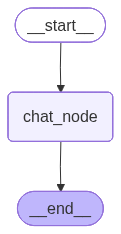

In [70]:
chatbot

In [71]:
# initial_state={
#     'messages':[HumanMessage(content='who is osama binladen')]
# }

# chatbot.invoke(initial_state)['messages'][-1].content

In [72]:
thread_id='1'
while True:
    user_message=input('user_input:')
    print('you:',user_message)

    if user_message.strip().lower() in ['exit','bye','quit','escape']:
        break


    config={'configurable':{'thread_id':thread_id}}
    
    response=chatbot.invoke({'messages':[HumanMessage(content=user_message)]},config=config)
    print("AI:",response['messages'][-1].content)
    print()

you: hello
AI: Hello. How can I assist you today?

you: i am milan!  tell me who are you in short
AI: Nice to meet you, Milan. I'm an AI, a computer program designed to understand and respond to human language.

you: okay let me ask you some questions
AI: Go ahead and ask me anything you'd like to know. I'll do my best to answer.

you: what is the result of 20 + 30
AI: 20 + 30 = 50.

you: now mulitply thie result with 3
AI: Multiplying 50 by 3 gives:

50 × 3 = 150.

you: what was my name ?
AI: Your name is Milan.

you: exit


In [ ]:

chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='hello', additional_kwargs={}, response_metadata={}, id='239b9bed-7052-415a-972a-7afee0da6e8d'), AIMessage(content='Hello. How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 36, 'total_tokens': 46, 'completion_time': 0.010795797, 'completion_tokens_details': None, 'prompt_time': 0.001597149, 'prompt_tokens_details': None, 'queue_time': 0.052406541, 'total_time': 0.012392946}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b6ae6-228e-7b91-ac9a-7720db01c67d-0', usage_metadata={'input_tokens': 36, 'output_tokens': 10, 'total_tokens': 46}), HumanMessage(content='i am milan!  tell me who are you in short', additional_kwargs={}, response_metadata={}, id='7395b45e-cd21-45f2-8e4c-e0f081f426be'), AIMessage(content="Nice t